In [ ]:
import kagglehub
bwandowando_dota_2_pro_league_matches_2023_path = kagglehub.dataset_download('bwandowando/dota-2-pro-league-matches-2023')

print('Data source import complete.')


# Получение файлов с kaggle

In [ ]:
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np

# Получение начальных данных. Объединение информации за 2024

In [ ]:
# Получение данных за 10 месяцев 2024 года по players
dataframes = {}
for i in range(1, 11):
    if i < 10:
        i_str = '0' + str(i)
    else:
        i_str = str(i)

    file_name = f'/kaggle/input/dota-2-pro-league-matches-2023/2024{i_str}/players.csv'
    df_name = f'players_2024_{i_str}'
    dataframes[df_name] = pd.read_csv(file_name, low_memory=False)

players_2024 = pd.concat(dataframes.values(), ignore_index=True)
players_2024.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
players_2024.head()

,match_id,player_slot,ability_targets,ability_upgrades_arr,ability_uses,account_id,actions,additional_units,assists,backpack_0,...,purchase_rapier,observers_placed,healing,team_number,team_slot,aghanims_scepter,aghanims_shard,moonshard,hero_variant,neutral_tokens_log
0,7515635423,0,{'earth_spirit_boulder_smash': {'npc_dota_hero...,"[5608, 5609, 5608, 5609, 5608, 5612, 5608, 560...","{'seasonal_party_hat': 1, 'earth_spirit_stone_...",177062248.0,"{'1': 7175, '2': 13, '3': 15, '4': 1733, '5': ...",NaN,21.0,0.0,...,NaN,0.0,"{'npc_dota_hero_earth_spirit': 2641, 'npc_dota...",0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,7515635423,1,{'morphling_adaptive_strike_agi': {'npc_dota_h...,"[5055, 5053, 5053, 5052, 5053, 5057, 5053, 505...","{'seasonal_party_hat': 1, 'morphling_morph_agi...",164322994.0,"{'1': 7336, '2': 10, '3': 49, '4': 1017, '5': ...",NaN,6.0,16.0,...,NaN,0.0,{'npc_dota_hero_morphling': 3227},0.0,1.0,0.0,0.0,0.0,NaN,NaN
2,7515635423,2,{'shadow_demon_disruption': {'npc_dota_hero_lu...,"[5421, 5423, 5423, 5421, 5423, 5425, 5423, 542...","{'ability_lamp_use': 3, 'shadow_demon_shadow_p...",294245092.0,"{'1': 5860, '2': 64, '3': 25, '4': 618, '5': 1...",NaN,18.0,0.0,...,NaN,4.0,"{'npc_dota_hero_shadow_demon': 1156, 'npc_dota...",0.0,2.0,0.0,1.0,0.0,NaN,NaN
3,7515635423,3,{'treant_leech_seed': {'npc_dota_hero_lion': 1...,"[5435, 338, 5435, 338, 5435, 5437, 5435, 338, ...","{'treant_leech_seed': 34, 'treant_natures_gras...",154357932.0,"{'1': 8202, '2': 121, '3': 14, '4': 458, '5': ...",NaN,19.0,16.0,...,NaN,7.0,"{'npc_dota_hero_treant': 6910, 'npc_dota_hero_...",0.0,3.0,0.0,1.0,0.0,NaN,NaN
4,7515635423,4,{},"[5062, 5059, 5062, 5059, 5059, 5062, 5059, 506...","{'ability_lamp_use': 2, 'nevermore_shadowraze2...",279486190.0,"{'1': 4417, '2': 13, '4': 2226, '5': 11, '6': ...",NaN,4.0,0.0,...,NaN,2.0,{'npc_dota_hero_nevermore': 1462},0.0,4.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
# удалим столбцы с большим количеством пропусков, если они есть
pct_null = players_2024.isna().sum() / len(players_2024)
missing_features = pct_null[pct_null > 0.70].index
players_2024.drop(missing_features, axis=1, inplace=True)
missing_features

Index(['additional_units', 'backpack_3', 'performance_others', 'repicked',
       'name', 'purchase_gem', 'purchase_rapier', 'neutral_tokens_log'],
      dtype='object')

## Отбор колонок
(только числовые) - есть еще столбцы с данными о действиях, но я пока не придумала как их обрабатывать \
• match_id - уникальный идентификатор матча \
• player_slot - слот игрока в команде \
• account_id - уникальный идентификатор игрока \
• hero_id - идентификатор героя \
• kills - количество убийств, совершенных игроком \
• hero_kills - количество убийств игроков, совершенных игроком \
• kills_per_min - количество убийств в минуту \
• kda -  соотношения между сумой убийств и ассистов на количество смертей \
• denies - количество убийств союзников \
• hero_healing - лечение союзных героев игроком \
• item_0 - item_5 - предметы, купленные командой \
• assists - помощь союзному герою в убийстве вражеского героя \
• deaths - количество смертей игрока \
• gold_per_min - общее количество золотых очков игрока в минуту \
• total_gold - общее количество золота за игру \
• hero_damage - общий урон героя вражеским героям \
• level - уровень игрока на конец игры \
• rune_pickups - количество подобранных рун \
• xp_per_min - количество опыта в минуту \
• total_xp - всего опыта \
• pings - задержка в миллисекундах между вашим действием и реакцией героя в игре \
• net_worth - общая ценность персонажа (количество кэша и инвентарь) \
• teamfight_participation - участие в командных боях \
• camps_stacked - количество stacked лагерей \
• creeps_stacked - количество stacked крипов из их лагеря \
• roshan_kills - общее количество убийств рошана, совершенных игроком \
• stuns - количество использованных оглушений \
• towers_killed - количество уничтоженных башен противника \
• tower_kills - количество уничтоженных башен ? \
• courier_kills - количество убитых курьеров игроком \
• observer_kills - количество уничтоженных Observer Ward \
• sentry_uses - количество использований Sentry Ward (возможность видеть невидимое \
• lane_efficiency_pct - процент эффективности на линии \
• lane - линия \
• lane_role - роль на линии \
• game_mode - набор ограничений, в рамках которых можно играть \
• actions_per_min -  количество действий игрока за минуту \
• rank_tier - ранг игрока \
• aghanims_scepter - наличие Scepter (0, 1, Nan) \
• moonshard - наличие moonshard (0, 1, Nan) \
• isRadiant - флаг укзалатель команды \
• win - флаг указатель победы \
• radiant_win

In [ ]:
# Отбор столбцов, для дальнейшего анализа
columns = ['match_id', 'player_slot', 'account_id', 'hero_id', 'kills',
'hero_kills', 'courier_kills', 'observer_kills', 'kills_per_min', 'kda', 'denies',
'hero_healing', 'item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'assists',
'hero_damage', 'deaths', 'gold_per_min', 'total_gold', 'gold_spent', 'level',
'rune_pickups','xp_per_min', 'total_xp', 'actions_per_min', 'pings', 'net_worth',
'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns',
'sentry_uses', 'lane_efficiency_pct', 'lane', 'lane_role', 'roshan_kills',
'tower_kills', 'game_mode', 'rank_tier', 'aghanims_scepter', 'moonshard', 'isRadiant', 'win', 'radiant_win']

In [ ]:
len(columns)

48

In [ ]:
players_2024_main = players_2024[columns]
players_2024_main.head()

,match_id,player_slot,account_id,hero_id,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,lane_role,roshan_kills,tower_kills,game_mode,rank_tier,aghanims_scepter,moonshard,isRadiant,win,radiant_win
0,7515635423,0,177062248.0,107.0,8.0,8.0,0.0,0.0,0.249221,3.63,...,3.0,0.0,1.0,2,NaN,0.0,0.0,True,1.0,True
1,7515635423,1,164322994.0,10.0,11.0,11.0,0.0,0.0,0.342679,4.25,...,1.0,0.0,3.0,2,NaN,0.0,0.0,True,1.0,True
2,7515635423,2,294245092.0,79.0,7.0,5.0,0.0,1.0,0.218069,5.00,...,3.0,0.0,0.0,2,NaN,0.0,0.0,True,1.0,True
3,7515635423,3,154357932.0,83.0,11.0,11.0,0.0,4.0,0.342679,3.33,...,1.0,0.0,0.0,2,NaN,0.0,0.0,True,1.0,True
4,7515635423,4,279486190.0,11.0,5.0,5.0,0.0,0.0,0.155763,1.80,...,2.0,0.0,4.0,2,NaN,0.0,0.0,True,1.0,True


In [ ]:
# Получение данных за 10 месяцев 2024 года по матчам (main_metadata.csv)
dataframes = {}
for i in range(1, 11):
    if i < 10:
        i_str = '0' + str(i)
    else:
        i_str = str(i)
    file_name = f'/kaggle/input/dota-2-pro-league-matches-2023/2024{i_str}/main_metadata.csv'
    df_name = f'match_2024_{i_str}'
    dataframes[df_name] = pd.read_csv(file_name, low_memory=False)

match_2024 = pd.concat(dataframes.values(), ignore_index=True)
match_2024.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
match_2024.head()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,engine,first_blood_time,game_mode,human_players,...,radiant_team_id,pre_game_duration,flags,radiant_logo,radiant_team_complete,dire_logo,dire_team_complete,radiant_captain,dire_captain,average_rank
0,7515635423,'00110100','00111111',274,26,1926,1,140,2,10,...,9048057.0,90.0,5.0,2.041868e+18,1.0,1.908989e+18,1.0,1.770622e+08,1.773383e+08,NaN
1,7515660161,'00111111','00001111',273,43,1731,1,121,2,10,...,8850100.0,90.0,5.0,1.908989e+18,1.0,2.041868e+18,1.0,8.408596e+08,2.942451e+08,NaN
2,7515737711,'00111101','00111111',271,25,2056,1,84,2,10,...,8893825.0,90.0,5.0,2.001336e+18,0.0,2.152217e+18,0.0,1.459124e+09,1.459382e+09,NaN
3,7515745579,'00110011','00111111',272,31,2221,1,28,2,10,...,8629324.0,90.0,5.0,2.017089e+18,1.0,2.036224e+18,1.0,1.173255e+09,9.486598e+08,NaN
4,7515769503,'00111111','00000000',153,21,1998,1,264,2,10,...,8736661.0,90.0,1.0,1.899975e+18,0.0,1.831290e+18,0.0,1.363522e+08,1.542238e+08,NaN


In [ ]:
# удалим столбцы с большим количеством пропусков, если они есть
pct_null = match_2024.isna().sum() / len(match_2024)
missing_features = pct_null[pct_null > 0.70].index
match_2024.drop(missing_features, axis=1, inplace=True)
missing_features

Index(['negative_votes', 'positive_votes', 'average_rank'], dtype='object')

In [ ]:
match_2024.columns

Index(['match_id', 'barracks_status_dire', 'barracks_status_radiant',
       'cluster', 'dire_score', 'duration', 'engine', 'first_blood_time',
       'game_mode', 'human_players', 'leagueid', 'lobby_type', 'match_seq_num',
       'radiant_score', 'radiant_win', 'start_date_time', 'tower_status_dire',
       'tower_status_radiant', 'version', 'replay_salt', 'series_id',
       'series_type', 'patch', 'region', 'throw', 'loss', 'comeback', 'stomp',
       'replay_url', 'dire_team_id', 'radiant_team_id', 'pre_game_duration',
       'flags', 'radiant_logo', 'radiant_team_complete', 'dire_logo',
       'dire_team_complete', 'radiant_captain', 'dire_captain'],
      dtype='object')

## Отбор колонок
• match_id - уникальный идентификатор матча \
• duration - длительность матча в секундах \
• first_blood_time - время первого убийства в секундах \
• start_date_time - дата и время начала матча \
• throw - максимальное преимущество команды игрока в золоте в случае проигрыша матча \
• loss - максимальное отставание в золоте команды игрока в случае проигрыша матча \
• comeback - максимальное отставание по золоту у команды игрока, если она выиграла матч

In [ ]:
# Колонки с адекватной информацией для анализа (по моему мнению)
match_columns = ['match_id', 'start_date_time', 'duration', 'first_blood_time',
'throw', 'loss', 'comeback', 'radiant_win']

In [ ]:
match_2024_main = match_2024[match_columns]
match_2024_main.head()

,match_id,start_date_time,duration,first_blood_time,throw,loss,comeback,radiant_win
0,7515635423,2024-01-01 00:24:16,1926,140,571.0,8188.0,NaN,True
1,7515660161,2024-01-01 01:06:17,1731,121,NaN,NaN,3347.0,False
2,7515737711,2024-01-01 03:11:08,2056,84,348.0,7541.0,NaN,True
3,7515745579,2024-01-01 03:23:40,2221,28,2602.0,11185.0,NaN,True
4,7515769503,2024-01-01 04:00:28,1998,264,NaN,NaN,1361.0,False


## Работа с объединеннными данными

In [ ]:
# Объединение информации об игроках и матчах
data = players_2024_main.merge(match_2024_main, on='match_id', how='left')

In [ ]:
data.head()

,match_id,player_slot,account_id,hero_id,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,isRadiant,win,radiant_win_x,start_date_time,duration,first_blood_time,throw,loss,comeback,radiant_win_y
0,7515635423,0,177062248.0,107.0,8.0,8.0,0.0,0.0,0.249221,3.63,...,True,1.0,True,2024-01-01 00:24:16,1926,140,571.0,8188.0,NaN,True
1,7515635423,1,164322994.0,10.0,11.0,11.0,0.0,0.0,0.342679,4.25,...,True,1.0,True,2024-01-01 00:24:16,1926,140,571.0,8188.0,NaN,True
2,7515635423,2,294245092.0,79.0,7.0,5.0,0.0,1.0,0.218069,5.00,...,True,1.0,True,2024-01-01 00:24:16,1926,140,571.0,8188.0,NaN,True
3,7515635423,3,154357932.0,83.0,11.0,11.0,0.0,4.0,0.342679,3.33,...,True,1.0,True,2024-01-01 00:24:16,1926,140,571.0,8188.0,NaN,True
4,7515635423,4,279486190.0,11.0,5.0,5.0,0.0,0.0,0.155763,1.80,...,True,1.0,True,2024-01-01 00:24:16,1926,140,571.0,8188.0,NaN,True


In [ ]:
# Перевод секунд в минуты
data['duration'] = (data['duration'] / 60)
data['first_blood_time'] = (data['first_blood_time'] / 60)

In [ ]:
# Тип данных
data['start_date_time'] = pd.to_datetime(data['start_date_time'])

In [ ]:
# Сортировка матчей по дате и времени начала
data = data.sort_values(by=['start_date_time'])

In [ ]:
data.head()

,match_id,player_slot,account_id,hero_id,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,isRadiant,win,radiant_win_x,start_date_time,duration,first_blood_time,throw,loss,comeback,radiant_win_y
0,7515635423,0,177062248.0,107.0,8.0,8.0,0.0,0.0,0.249221,3.63,...,True,1.0,True,2024-01-01 00:24:16,32.1,2.333333,571.0,8188.0,NaN,True
1,7515635423,1,164322994.0,10.0,11.0,11.0,0.0,0.0,0.342679,4.25,...,True,1.0,True,2024-01-01 00:24:16,32.1,2.333333,571.0,8188.0,NaN,True
2,7515635423,2,294245092.0,79.0,7.0,5.0,0.0,1.0,0.218069,5.00,...,True,1.0,True,2024-01-01 00:24:16,32.1,2.333333,571.0,8188.0,NaN,True
3,7515635423,3,154357932.0,83.0,11.0,11.0,0.0,4.0,0.342679,3.33,...,True,1.0,True,2024-01-01 00:24:16,32.1,2.333333,571.0,8188.0,NaN,True
4,7515635423,4,279486190.0,11.0,5.0,5.0,0.0,0.0,0.155763,1.80,...,True,1.0,True,2024-01-01 00:24:16,32.1,2.333333,571.0,8188.0,NaN,True


In [ ]:
data.columns

Index(['match_id', 'player_slot', 'account_id', 'hero_id', 'kills',
       'hero_kills', 'courier_kills', 'observer_kills', 'kills_per_min', 'kda',
       'denies', 'hero_healing', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'assists', 'hero_damage', 'deaths', 'gold_per_min',
       'total_gold', 'gold_spent', 'level', 'rune_pickups', 'xp_per_min',
       'total_xp', 'actions_per_min', 'pings', 'net_worth',
       'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns',
       'sentry_uses', 'lane_efficiency_pct', 'lane', 'lane_role',
       'roshan_kills', 'tower_kills', 'game_mode', 'rank_tier',
       'aghanims_scepter', 'moonshard', 'isRadiant', 'win', 'radiant_win_x',
       'start_date_time', 'duration', 'first_blood_time', 'throw', 'loss',
       'comeback', 'radiant_win_y'],
      dtype='object')

## Агрегированная информация по действиям игрока за предыдущие матчи

In [ ]:
df = data

In [ ]:
def calculate_expanding_average(df, group_col, target_cols):
    for col in target_cols:
        df[f'previous_{col}_avr'] = df.groupby(group_col)[col].transform(lambda x: x.shift().expanding().mean())
    return df

In [ ]:
df = calculate_expanding_average(df, 'account_id', ['kills', 'hero_kills', 'courier_kills',
'observer_kills', 'kills_per_min', 'kda', 'denies', 'hero_healing', 'assists',
'hero_damage', 'deaths', 'gold_per_min', 'total_gold', 'gold_spent', 'level',
'rune_pickups', 'xp_per_min', 'total_xp', 'actions_per_min', 'pings', 'net_worth',
'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns', 'sentry_uses',
'lane_efficiency_pct', 'roshan_kills', 'tower_kills', 'win', 'duration', 'first_blood_time'])

In [ ]:
df.head()

,match_id,player_slot,account_id,hero_id,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,previous_camps_stacked_avr,previous_creeps_stacked_avr,previous_stuns_avr,previous_sentry_uses_avr,previous_lane_efficiency_pct_avr,previous_roshan_kills_avr,previous_tower_kills_avr,previous_win_avr,previous_duration_avr,previous_first_blood_time_avr
0,7515635423,0,177062248.0,107.0,8.0,8.0,0.0,0.0,0.249221,3.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7515635423,1,164322994.0,10.0,11.0,11.0,0.0,0.0,0.342679,4.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7515635423,2,294245092.0,79.0,7.0,5.0,0.0,1.0,0.218069,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7515635423,3,154357932.0,83.0,11.0,11.0,0.0,4.0,0.342679,3.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7515635423,4,279486190.0,11.0,5.0,5.0,0.0,0.0,0.155763,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['match_id', 'player_slot', 'account_id', 'hero_id', 'kills',
       'hero_kills', 'courier_kills', 'observer_kills', 'kills_per_min', 'kda',
       'denies', 'hero_healing', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'assists', 'hero_damage', 'deaths', 'gold_per_min',
       'total_gold', 'gold_spent', 'level', 'rune_pickups', 'xp_per_min',
       'total_xp', 'actions_per_min', 'pings', 'net_worth',
       'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns',
       'sentry_uses', 'lane_efficiency_pct', 'lane', 'lane_role',
       'roshan_kills', 'tower_kills', 'game_mode', 'rank_tier',
       'aghanims_scepter', 'moonshard', 'isRadiant', 'win', 'radiant_win_x',
       'start_date_time', 'duration', 'first_blood_time', 'throw', 'loss',
       'comeback', 'radiant_win_y', 'previous_kills_avr',
       'previous_hero_kills_avr', 'previous_courier_kills_avr',
       'previous_observer_kills_avr', 'previous_kills_per_min_avr',
       'previous

## Агрегированная информация по командам (radiant, dire) за предыдущие матчи
средние, максимальные и минимальные показатели по игрокам в команде за предыдущие матчи

In [ ]:
def calculate_stats(group, columns):
    stats = {}
    for column in columns:
        stats[f'mean_{column}'] = group[column].mean()
        stats[f'min_{column}'] = group[column].min()
        stats[f'max_{column}'] = group[column].max()
    return pd.Series(stats)

In [ ]:
columns_to_analyze = ['previous_kills_avr',
       'previous_hero_kills_avr', 'previous_courier_kills_avr',
       'previous_observer_kills_avr', 'previous_kills_per_min_avr',
       'previous_kda_avr', 'previous_denies_avr', 'previous_hero_healing_avr',
       'previous_assists_avr', 'previous_hero_damage_avr',
       'previous_deaths_avr', 'previous_gold_per_min_avr',
       'previous_total_gold_avr', 'previous_gold_spent_avr',
       'previous_level_avr', 'previous_rune_pickups_avr',
       'previous_xp_per_min_avr', 'previous_total_xp_avr',
       'previous_actions_per_min_avr', 'previous_pings_avr',
       'previous_net_worth_avr', 'previous_teamfight_participation_avr',
       'previous_camps_stacked_avr', 'previous_creeps_stacked_avr',
       'previous_stuns_avr', 'previous_sentry_uses_avr',
       'previous_lane_efficiency_pct_avr', 'previous_roshan_kills_avr',
       'previous_tower_kills_avr', 'previous_win_avr', 'previous_duration_avr',
       'previous_first_blood_time_avr']

In [ ]:
stats = df.groupby(['match_id', 'isRadiant']).apply(calculate_stats, columns=columns_to_analyze, include_groups=False).reset_index()
stats.head()

,match_id,isRadiant,mean_previous_kills_avr,min_previous_kills_avr,max_previous_kills_avr,mean_previous_hero_kills_avr,min_previous_hero_kills_avr,max_previous_hero_kills_avr,mean_previous_courier_kills_avr,min_previous_courier_kills_avr,...,max_previous_tower_kills_avr,mean_previous_win_avr,min_previous_win_avr,max_previous_win_avr,mean_previous_duration_avr,min_previous_duration_avr,max_previous_duration_avr,mean_previous_first_blood_time_avr,min_previous_first_blood_time_avr,max_previous_first_blood_time_avr
0,7515635423,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7515635423,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7515660161,False,8.4,5.0,11.0,8.0,5.0,11.0,0.0,0.0,...,4.0,1.0,1.0,1.0,32.1,32.1,32.1,2.333333,2.333333,2.333333
3,7515660161,True,5.2,0.0,8.0,5.2,0.0,8.0,1.0,0.0,...,1.0,0.0,0.0,0.0,32.1,32.1,32.1,2.333333,2.333333,2.333333
4,7515737711,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.merge(stats, on=['match_id', 'isRadiant'], how='left')

In [ ]:
df.tail(15)

,match_id,player_slot,account_id,hero_id,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,max_previous_tower_kills_avr,mean_previous_win_avr,min_previous_win_avr,max_previous_win_avr,mean_previous_duration_avr,min_previous_duration_avr,max_previous_duration_avr,mean_previous_first_blood_time_avr,min_previous_first_blood_time_avr,max_previous_first_blood_time_avr
246500,8013391008,2,1.202314e+08,99.0,12.0,12.0,0.0,1.0,0.313043,2.33,...,1.714571,0.466383,0.463717,0.477046,31.814131,31.813422,31.816966,3.196058,3.141351,3.209735
246501,8013391008,3,2.648698e+08,26.0,4.0,4.0,0.0,1.0,0.104348,1.80,...,1.714571,0.466383,0.463717,0.477046,31.814131,31.813422,31.816966,3.196058,3.141351,3.209735
246502,8013391008,1,1.261304e+08,9.0,2.0,2.0,0.0,1.0,0.052174,1.63,...,1.714571,0.466383,0.463717,0.477046,31.814131,31.813422,31.816966,3.196058,3.141351,3.209735
246503,8013391008,0,3.677169e+07,19.0,6.0,6.0,1.0,1.0,0.156522,1.22,...,1.714571,0.466383,0.463717,0.477046,31.814131,31.813422,31.816966,3.196058,3.141351,3.209735
246504,8013391008,4,1.674674e+09,49.0,3.0,3.0,0.0,1.0,0.078261,1.22,...,1.714571,0.466383,0.463717,0.477046,31.814131,31.813422,31.816966,3.196058,3.141351,3.209735
246505,8013424448,131,3.677169e+07,74.0,6.0,6.0,0.0,0.0,0.176730,6.50,...,1.711155,0.465537,0.462898,0.476096,31.825942,31.824941,31.829947,3.193652,3.138811,3.207362
246506,8013424448,0,1.922376e+08,14.0,3.0,3.0,0.0,1.0,0.088365,0.73,...,1.481203,0.496241,0.496241,0.496241,31.876942,31.876942,31.876942,2.887719,2.887719,2.887719
246507,8013424448,1,3.256686e+08,7.0,6.0,6.0,0.0,0.0,0.176730,1.33,...,1.481203,0.496241,0.496241,0.496241,31.876942,31.876942,31.876942,2.887719,2.887719,2.887719
246508,8013424448,2,2.859602e+08,37.0,5.0,5.0,1.0,1.0,0.147275,2.83,...,1.481203,0.496241,0.496241,0.496241,31.876942,31.876942,31.876942,2.887719,2.887719,2.887719
246509,8013424448,3,3.314800e+08,30.0,5.0,5.0,0.0,1.0,0.147275,1.45,...,1.481203,0.496241,0.496241,0.496241,31.876942,31.876942,31.876942,2.887719,2.887719,2.887719


## Добавим имя предмета и имя игрока вместо номеров в колонках item1-item5, hero_id

In [ ]:
item = pd.read_csv('/kaggle/input/dota-2-pro-league-matches-2023/Constants/Constants.ItemIDs.csv')
item.head()

,id,name
0,0,ability_base
1,1,blink
2,2,blades_of_attack
3,3,broadsword
4,4,chainmail


In [ ]:
item_column = ['item_0','item_1', 'item_2', 'item_3', 'item_4', 'item_5']
for column in item_column:
    df[column] = df[column].map(item.set_index('id')['name'])

In [ ]:
heroes = pd.read_csv('/kaggle/input/dota-2-pro-league-matches-2023/Constants/Constants.Heroes.csv')
heroes.drop(columns='Unnamed: 0', inplace=True)
heroes.head()

,id,name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,base_mana,...,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,localized_name
0,1,npc_dota_hero_antimage,agi,Melee,"['Carry', 'Escape', 'Nuker']",/apps/dota2/images/dota_react/heroes/antimage....,/apps/dota2/images/dota_react/heroes/icons/ant...,120,1.00,75,...,1.4,100,0.30,310,NaN,True,2,1800,800,Anti-Mage
1,2,npc_dota_hero_axe,str,Melee,"['Initiator', 'Durable', 'Disabler', 'Carry']",/apps/dota2/images/dota_react/heroes/axe.png?,/apps/dota2/images/dota_react/heroes/icons/axe...,120,2.50,75,...,1.7,100,0.40,315,NaN,True,2,1800,800,Axe
2,3,npc_dota_hero_bane,all,Ranged,"['Support', 'Disabler', 'Nuker', 'Durable']",/apps/dota2/images/dota_react/heroes/bane.png?,/apps/dota2/images/dota_react/heroes/icons/ban...,120,0.25,75,...,1.7,100,0.30,305,NaN,True,4,1800,1200,Bane
3,4,npc_dota_hero_bloodseeker,agi,Melee,"['Carry', 'Disabler', 'Nuker', 'Initiator']",/apps/dota2/images/dota_react/heroes/bloodseek...,/apps/dota2/images/dota_react/heroes/icons/blo...,120,0.25,75,...,1.7,100,0.43,285,NaN,True,2,1800,800,Bloodseeker
4,5,npc_dota_hero_crystal_maiden,int,Ranged,"['Support', 'Disabler', 'Nuker']",/apps/dota2/images/dota_react/heroes/crystal_m...,/apps/dota2/images/dota_react/heroes/icons/cry...,120,0.25,75,...,1.7,100,0.45,280,NaN,True,2,1800,800,Crystal Maiden


In [ ]:
# добавим также тип атаки героя и основной атрибут героя
df['hero_id'] = df['hero_id'].map(heroes.set_index('id')['localized_name'])
df.rename(columns={'hero_id': 'hero_name'}, inplace=True)
df['primary_attr'] = df['hero_name'].map(heroes.set_index('localized_name')['primary_attr'])
df['attack_type'] = df['hero_name'].map(heroes.set_index('localized_name')['attack_type'])
df.head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,min_previous_win_avr,max_previous_win_avr,mean_previous_duration_avr,min_previous_duration_avr,max_previous_duration_avr,mean_previous_first_blood_time_avr,min_previous_first_blood_time_avr,max_previous_first_blood_time_avr,primary_attr,attack_type
0,7515635423,0,177062248.0,Earth Spirit,8.0,8.0,0.0,0.0,0.249221,3.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,str,Melee
1,7515635423,1,164322994.0,Morphling,11.0,11.0,0.0,0.0,0.342679,4.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,agi,Ranged
2,7515635423,2,294245092.0,Shadow Demon,7.0,5.0,0.0,1.0,0.218069,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,int,Ranged
3,7515635423,3,154357932.0,Treant Protector,11.0,11.0,0.0,4.0,0.342679,3.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,str,Melee
4,7515635423,4,279486190.0,Shadow Fiend,5.0,5.0,0.0,0.0,0.155763,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,agi,Ranged


In [ ]:
df.drop('radiant_win_y', axis=1, inplace=True)
df.rename(columns={'radiant_win_x': 'radiant_win'}, inplace=True)

# Загрузка данных в csv файл

In [ ]:
# df.to_csv('dota2.csv', sep=',', index=False, encoding='utf-8')

# EDA

In [ ]:
# Импорт библиотек
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# размер датасета
df.shape

(246515, 185)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246515 entries, 0 to 246514
Columns: 185 entries, match_id to hero_roles
dtypes: datetime64[ns](1), float64(169), int64(3), object(12)
memory usage: 347.9+ MB


## Работа с пропусками

In [ ]:
df[['match_id', 'hero_name', 'lane_role', 'lane']][df['lane'] == 1].head(20)

,match_id,hero_name,lane_role,lane
1,7515635423,Morphling,1.0,1.0
3,7515635423,Treant Protector,1.0,1.0
5,7515635423,Spirit Breaker,3.0,1.0
9,7515635423,Lion,3.0,1.0
11,7515660161,Earth Spirit,3.0,1.0
13,7515660161,Hoodwink,3.0,1.0
15,7515660161,Spectre,1.0,1.0
19,7515660161,Dazzle,1.0,1.0
20,7515737711,Winter Wyvern,3.0,1.0
23,7515737711,Sand King,3.0,1.0


In [ ]:
# вывод пропусков
pd.set_option('display.max_rows', None)
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

account_id                                       26
hero_kills                                      369
courier_kills                                   369
observer_kills                                  369
kills_per_min                                 15041
rune_pickups                                    369
total_xp                                        771
actions_per_min                                 369
pings                                         29964
teamfight_participation                         369
camps_stacked                                   369
creeps_stacked                                  369
stuns                                           369
sentry_uses                                     369
lane_efficiency_pct                            1082
lane                                            502
lane_role                                       502
roshan_kills                                    369
tower_kills                                     369
rank_tier   

In [ ]:
# Пропуски в %
pd.set_option('display.max_rows', None)
missing_values = df.isna().mean() * 100
missing_values = missing_values[missing_values > 0]
print(missing_values)

account_id                                    0.010547
hero_kills                                    0.149687
courier_kills                                 0.149687
observer_kills                                0.149687
kills_per_min                                 6.101454
rune_pickups                                  0.149687
total_xp                                      0.312760
actions_per_min                               0.149687
pings                                        12.155041
teamfight_participation                       0.149687
camps_stacked                                 0.149687
creeps_stacked                                0.149687
stuns                                         0.149687
sentry_uses                                   0.149687
lane_efficiency_pct                           0.438919
lane                                          0.203639
lane_role                                     0.203639
roshan_kills                                  0.149687
tower_kill

Есть 7 пропусков в переменной win, а также некоторые строки без account_id. Большое количество пропусков в переменных rank_tier, pings, throw, loss, comeback (пропуски в последниx 3 переменных составляют большую часть от выборки, поскольку есть другие признаки, отражающие накопление золота, удалим данные столбцы). Переменные 'previous_{}_avr' имеют пропуски из-за формулы расчета, при расчете использовалось скользящее среднее для наблюдений, у которых не было предыдущих данных возвращалось Nan. Переменные 'max/mean/min_previous_{}_avr' также имеют пропуски из-за методики расчета, их меньше, чем в переменных  'previous_{}_avr' поскольку агрегируется информация по команде. 369 пропусков в некоторых переменных возможно связаны с неатакующим классом игрока. Большой % пропусков в переменной rank_tier вероятно связан с тем, что до этого игрок играл в нерейтинговых режимах. Проанализируем подробней.  

In [ ]:
col = ['pings', 'throw', 'loss', 'comeback', 'rank_tier']
df.drop(col, axis=1, inplace=True)

Вероятно аккаунты без account_id играли в анонимном режиме, для некоторых match_id
не все члены команды не имеют account_id (но большая чать игроков), поскольку в некоторых вся команда без account_id невозможен сбор исторических данных, необходимо удалить эти матчи из выборки.

In [ ]:
df[df['account_id'].isna()].head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,max_previous_win_avr,mean_previous_duration_avr,min_previous_duration_avr,max_previous_duration_avr,mean_previous_first_blood_time_avr,min_previous_first_blood_time_avr,max_previous_first_blood_time_avr,primary_attr,attack_type,hero_roles
5669,7529291293,132,NaN,Bane,6.0,6.0,0.0,0.0,0.118304,3.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all,Ranged,"['Support', 'Disabler', 'Nuker', 'Durable']"
5670,7529291293,131,NaN,Dazzle,0.0,0.0,0.0,0.0,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all,Ranged,"['Support', 'Nuker', 'Disabler']"
5671,7529291293,129,NaN,Lion,0.0,0.0,0.0,0.0,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,int,Ranged,"['Support', 'Disabler', 'Nuker', 'Initiator']"
5673,7529291293,130,NaN,Phantom Assassin,5.0,5.0,0.0,0.0,0.098587,11.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,agi,Melee,"['Carry', 'Escape']"
5674,7529291293,3,NaN,Juggernaut,5.0,5.0,0.0,0.0,0.098587,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,agi,Melee,"['Carry', 'Pusher', 'Escape']"


In [ ]:
invalid_match_ids = df[df['account_id'].isna()]['match_id'].unique()
df.drop(df[df['match_id'].isin(invalid_match_ids)].index, inplace=True)

In [ ]:
# в одном из матчей нет разделения на комнады, а также неизвестен исход матча,
#удалим его из выборки
df[df['win'].isna()].head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,max_previous_win_avr,mean_previous_duration_avr,min_previous_duration_avr,max_previous_duration_avr,mean_previous_first_blood_time_avr,min_previous_first_blood_time_avr,max_previous_first_blood_time_avr,primary_attr,attack_type,hero_roles
7901,7531639368,129,94004717.0,Ogre Magi,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,str,Melee,"['Support', 'Nuker', 'Disabler', 'Durable', 'I..."
7902,7531639368,132,107579895.0,Phantom Lancer,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,agi,Melee,"['Carry', 'Escape', 'Pusher', 'Nuker']"
7903,7531639368,4,99796146.0,Keeper of the Light,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,int,Ranged,"['Support', 'Nuker', 'Disabler']"
7904,7531639368,131,85312703.0,Venomancer,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all,Ranged,"['Support', 'Nuker', 'Initiator', 'Pusher', 'D..."
7905,7531639368,2,138535219.0,Necrophos,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,int,Ranged,"['Carry', 'Nuker', 'Durable', 'Disabler']"


In [ ]:
df.drop(df[df['match_id'] == 7531639368].index, inplace=True)

In [ ]:
# Рассмотрим пропуски в переменных, отражающих игровую статистику
df[df['courier_kills'].isna()].head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,max_previous_win_avr,mean_previous_duration_avr,min_previous_duration_avr,max_previous_duration_avr,mean_previous_first_blood_time_avr,min_previous_first_blood_time_avr,max_previous_first_blood_time_avr,primary_attr,attack_type,hero_roles
13991,7540598399,132,2.610144e+08,Treant Protector,1.0,NaN,NaN,NaN,0.031612,0.86,...,0.333333,36.166667,36.166667,36.166667,0.472222,0.472222,0.472222,str,Melee,"['Support', 'Initiator', 'Durable', 'Disabler'..."
13992,7540598399,131,1.482969e+09,Grimstroke,0.0,NaN,NaN,NaN,NaN,2.00,...,0.333333,36.166667,36.166667,36.166667,0.472222,0.472222,0.472222,int,Ranged,"['Support', 'Nuker', 'Disabler', 'Escape']"
13993,7540598399,129,1.245805e+09,Slardar,1.0,NaN,NaN,NaN,0.031612,0.50,...,0.333333,36.166667,36.166667,36.166667,0.472222,0.472222,0.472222,str,Melee,"['Carry', 'Durable', 'Initiator', 'Disabler', ..."
13994,7540598399,128,1.760019e+08,Windranger,8.0,NaN,NaN,NaN,0.252898,1.63,...,0.333333,36.166667,36.166667,36.166667,0.472222,0.472222,0.472222,all,Ranged,"['Carry', 'Support', 'Disabler', 'Escape', 'Nu..."
13995,7540598399,130,1.281508e+09,Sniper,6.0,NaN,NaN,NaN,0.189673,1.63,...,0.333333,36.166667,36.166667,36.166667,0.472222,0.472222,0.472222,agi,Ranged,"['Carry', 'Nuker']"


В строках, где показатели действий в матче Nan можно заметить много строк с kills = 0,
в иных случаях вероятно игроком не было использовано hero_kills, courier_kills,
observer_kills, rune_pickups, teamfight_participation, camps_stacked, creeps_stacked, stuns, sentry_uses, roshan_kills, tower_kills заменим эти пропуски на 0, также заменим на 0 Nan kills_per_min, где kills = 0.

In [ ]:
df[['hero_kills', 'courier_kills', 'observer_kills', 'rune_pickups', 'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns', 'sentry_uses', 'roshan_kills', 'tower_kills']] = df[['hero_kills', 'courier_kills', 'observer_kills', 'rune_pickups', 'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns', 'sentry_uses', 'roshan_kills', 'tower_kills']].fillna(0)

In [ ]:
df['kills_per_min'] = df.apply(lambda row: 0 if pd.isna(row['kills_per_min'])
and row['kills'] == 0 else row['kills_per_min'], axis=1)

In [ ]:
df['kills_per_min'].isna().sum()

0

## Описательные статистики, визуализация

In [ ]:
df['game_mode'].value_counts()

game_mode
2     242298
1       1855
22      1735
16       460
21       100
4         30
Name: count, dtype: int64

In [ ]:
# Описательные статистики по числовым переменным
df.describe()

,match_id,player_slot,account_id,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,denies,...,max_previous_tower_kills_avr,mean_previous_win_avr,min_previous_win_avr,max_previous_win_avr,mean_previous_duration_avr,min_previous_duration_avr,max_previous_duration_avr,mean_previous_first_blood_time_avr,min_previous_first_blood_time_avr,max_previous_first_blood_time_avr
count,2.464780e+05,246478.000000,2.464780e+05,246478.000000,246478.000000,246478.000000,246478.000000,246478.000000,246478.000000,246478.000000,...,241377.000000,241377.000000,241377.000000,241377.000000,241377.000000,241377.000000,241377.000000,241377.000000,241377.000000,241377.000000
mean,7.758278e+09,65.995927,6.936463e+08,5.662806,5.638341,0.229416,0.857598,0.177559,3.873275,5.730564,...,2.102331,0.520481,0.470333,0.568497,33.376655,32.417796,34.281975,2.017293,1.877224,2.160194
min,7.515635e+09,0.000000,4.244300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.883333,5.883333,5.883333,0.000000,0.000000,0.000000
25%,7.632870e+09,2.000000,1.680287e+08,2.000000,2.000000,0.000000,0.000000,0.072639,1.330000,1.000000,...,1.637363,0.475060,0.412371,0.500000,29.727440,29.499342,29.826584,1.298566,1.120000,1.483542
50%,7.759299e+09,4.000000,3.707361e+08,5.000000,5.000000,0.000000,0.000000,0.143121,2.500000,4.000000,...,1.860902,0.516691,0.495726,0.547170,33.303309,32.180260,34.134595,1.927803,1.779085,2.103333
75%,7.886902e+09,130.000000,1.209228e+09,8.000000,8.000000,0.000000,1.000000,0.245758,4.750000,8.000000,...,2.545455,0.568627,0.537037,0.620112,36.517613,34.972748,37.891870,2.798384,2.772097,2.826965
max,8.013424e+09,132.000000,1.837860e+09,48.000000,48.000000,22.000000,18.000000,1.733333,58.000000,82.000000,...,10.000000,1.000000,1.000000,1.000000,69.533333,69.533333,74.733333,9.283333,9.283333,10.100000
std,1.485371e+08,64.015777,5.935246e+08,4.466714,4.474970,0.573007,1.284993,0.145365,4.263386,5.893221,...,0.786649,0.126822,0.152185,0.144104,4.482369,4.403927,5.084514,0.828460,0.916554,0.792239


In [ ]:
# Описательные статистики категориальных переменных
df.describe(include='object')

,hero_name,item_0,item_1,item_2,item_3,item_4,item_5,isRadiant,radiant_win,primary_attr,attack_type,hero_roles
count,246478,246478,246478,246478,246478,246478,246478,246478,246478,246478,246478,246478
unique,124,203,204,205,207,206,214,2,2,4,2,102
top,Rubick,power_treads,magic_wand,magic_wand,magic_wand,magic_wand,ability_base,True,True,str,Ranged,"['Support', 'Disabler', 'Nuker']"
freq,6904,19913,20112,23474,17994,18640,24766,123246,126329,69252,134533,13769


In [ ]:
# Средние значение по всему датасету по выборочным показателям матчей
df[['kills', 'kills_per_min', 'kda', 'denies', 'hero_healing', 'assists',
'deaths', 'gold_per_min', 'xp_per_min', 'actions_per_min',
'duration', 'first_blood_time']].mean()

kills                 5.662806
kills_per_min         0.177559
kda                   3.873275
denies                5.730564
hero_healing        850.664067
assists              11.703937
deaths                5.769647
gold_per_min        485.579934
xp_per_min          622.184467
actions_per_min     275.825317
duration             33.126540
first_blood_time      2.026735
dtype: float64

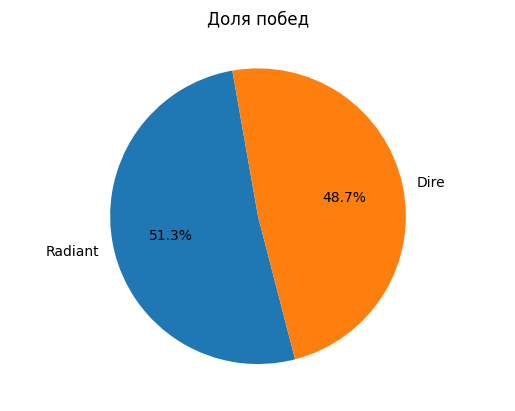

In [ ]:
# Доля побед по командам
X = [df['win'][(df['isRadiant']==True)].sum(), df['win'][(df['isRadiant']==False)].sum()]
Y = ['Radiant','Dire']

plt.title('Доля побед')
plt.axis('equal')
plt.pie(X, labels=Y, startangle=100, autopct='%.1f%%')
plt.show()

In [ ]:
# Рассчитаем топ 20 популярных героев
hero_count = df.groupby(['hero_name'], as_index=False)['account_id'].count().sort_values(by=['account_id'], ascending=False).head(20)
hero_count

,hero_name,account_id
84,Rubick,6904
105,Tiny,5254
53,Luna,5049
19,Crystal Maiden,4688
119,Windranger,4669
112,Vengeful Spirit,4669
38,Hoodwink,4476
27,Dragon Knight,4330
14,Centaur Warrunner,4246
79,Pudge,4049


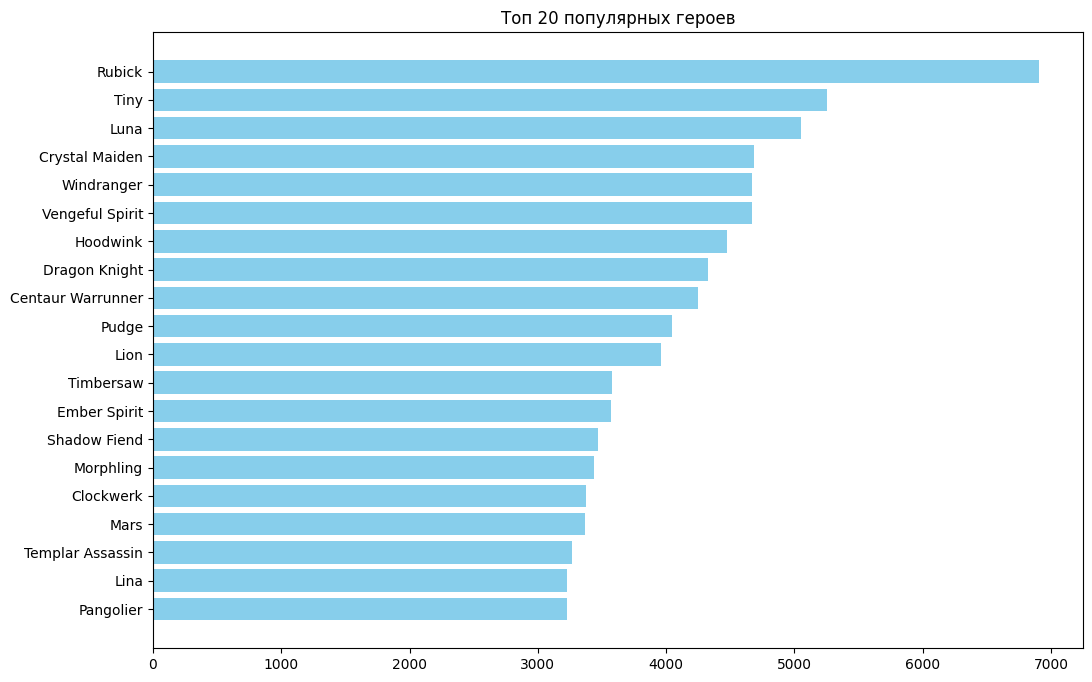

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(hero_count['hero_name'], hero_count['account_id'], color='skyblue')
plt.title('Топ 20 популярных героев')
plt.gca().invert_yaxis()  # Инвертировать ось Y для правильного отображения
plt.show()

In [ ]:
# Рассмотрим популярные items
melted_df = df.melt(value_vars=['item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5'], value_name='item')
melted_df = melted_df.dropna()
items_count = melted_df['item'].value_counts()
top_20_items = items_count.head(20)
top_20_items

item
magic_wand          112513
ability_base         80890
blink                79211
power_treads         71456
arcane_boots         62209
black_king_bar       55582
bracer               55254
ultimate_scepter     44838
phase_boots          41073
wraith_band          28986
manta                24715
ward_dispenser       22695
tranquil_boots       22260
dust                 21132
null_talisman        20168
force_staff          19654
wind_lace            18827
glimmer_cape         18014
aether_lens          16705
bottle               16580
Name: count, dtype: int64

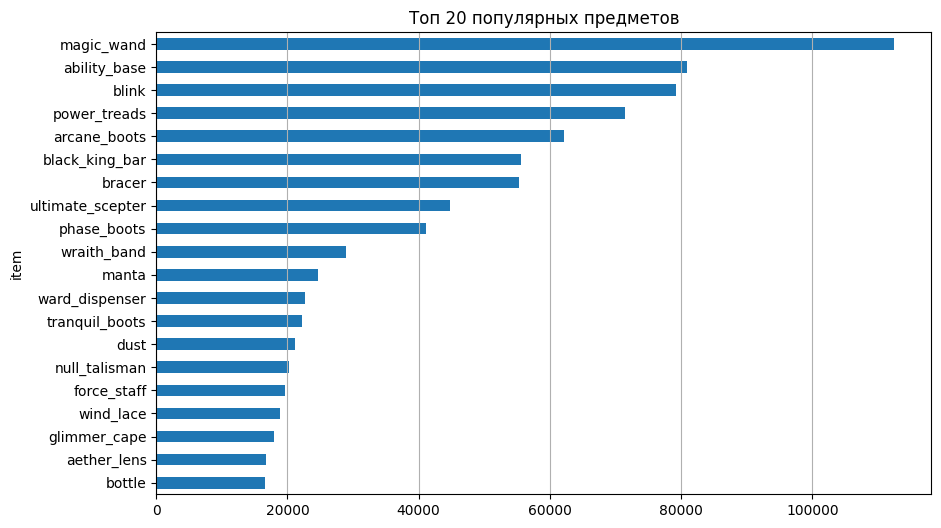

In [ ]:
plt.figure(figsize=(10, 6))
top_20_items.plot(kind='barh')
plt.title('Топ 20 популярных предметов')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [ ]:
df.columns[:53]

Index(['match_id', 'player_slot', 'account_id', 'hero_name', 'kills',
       'hero_kills', 'courier_kills', 'observer_kills', 'kills_per_min', 'kda',
       'denies', 'hero_healing', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'assists', 'hero_damage', 'deaths', 'gold_per_min',
       'total_gold', 'gold_spent', 'level', 'rune_pickups', 'xp_per_min',
       'total_xp', 'actions_per_min', 'net_worth', 'teamfight_participation',
       'camps_stacked', 'creeps_stacked', 'stuns', 'sentry_uses',
       'lane_efficiency_pct', 'lane', 'lane_role', 'roshan_kills',
       'tower_kills', 'game_mode', 'aghanims_scepter', 'moonshard',
       'isRadiant', 'win', 'radiant_win', 'start_date_time', 'duration',
       'first_blood_time', 'previous_kills_avr', 'previous_hero_kills_avr',
       'previous_courier_kills_avr', 'previous_observer_kills_avr'],
      dtype='object')

In [ ]:
# Рассмотрим статистику по героям (вывела топ 20 с наибольшим winrate)
columns = ['hero_name', 'win', 'kills', 'hero_kills', 'courier_kills', 'observer_kills',
'kills_per_min', 'kda', 'denies', 'hero_healing', 'assists', 'deaths',
'gold_per_min', 'xp_per_min', 'rune_pickups', 'actions_per_min', 'net_worth',
'teamfight_participation','camps_stacked', 'creeps_stacked', 'stuns',
'duration', 'first_blood_time', 'sentry_uses', 'lane_efficiency_pct', 'lane', 'lane_role', 'roshan_kills',
'tower_kills']
heroes_stats = df[columns].groupby(['hero_name']).mean()
heroes_stats.sort_values(by=['win'], ascending=False).head(20)

,win,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,denies,hero_healing,assists,...,creeps_stacked,stuns,duration,first_blood_time,sentry_uses,lane_efficiency_pct,lane,lane_role,roshan_kills,tower_kills
hero_name,,,,,,,,,,,,,,,,,,,,,
Chen,0.628602,2.250800,2.213447,0.209178,1.548559,0.079404,4.800235,3.842049,8421.970117,14.712914,...,7.551761,4.854750,32.570989,1.777286,5.929562,48.458647,2.054662,1.201501,0.120598,1.121665
Broodmother,0.550302,7.542254,7.546278,0.320926,0.588531,0.257522,4.810785,8.842052,163.967807,9.607646,...,1.089537,1.377760,31.425352,1.872485,0.405433,82.658586,1.978873,2.242455,0.248491,2.545272
Enigma,0.549712,3.857847,3.840592,0.191454,0.656532,0.120933,3.725801,10.189811,1892.304848,13.894002,...,4.294166,30.367681,34.845796,1.905053,1.507806,70.470297,2.041118,2.612664,0.097781,1.361545
Bane,0.538912,3.323849,3.313808,0.248536,1.846862,0.108930,2.857054,3.220084,96.024268,14.894561,...,6.113808,79.043924,32.925132,2.014059,5.908787,40.615126,2.015913,1.567839,0.018410,0.157322
Omniknight,0.535185,4.473148,4.476852,0.211111,1.149074,0.143278,3.443769,5.990741,4115.986111,10.556481,...,2.371296,0.123460,32.786034,1.981049,3.676852,55.403346,2.017593,1.806481,0.087963,0.471296
Nature's Prophet,0.533939,6.031071,5.963193,0.323136,0.983270,0.195006,3.778829,4.883365,300.384321,14.382887,...,5.899140,16.670235,32.604581,1.685891,2.737572,59.770159,1.972062,1.945568,0.108509,1.321224
Brewmaster,0.533103,5.125517,5.102759,0.194483,0.410345,0.150517,5.179703,10.413103,455.631724,12.531034,...,3.144828,39.580811,35.943046,1.629563,0.164138,72.161469,1.994464,2.927336,0.150345,1.349655
Bounty Hunter,0.533013,6.144058,6.123649,0.831933,0.978391,0.200542,3.495294,3.219688,364.170468,14.420168,...,1.102041,13.151146,31.823329,1.767367,2.352941,61.813028,2.031288,2.381468,0.026411,0.309724
Leshrac,0.532758,7.357034,7.337735,0.153885,0.653123,0.233088,3.846003,5.333672,222.332656,10.364652,...,6.958354,27.605358,33.204740,1.997969,1.165566,78.835115,2.004065,2.102134,0.184865,1.737430


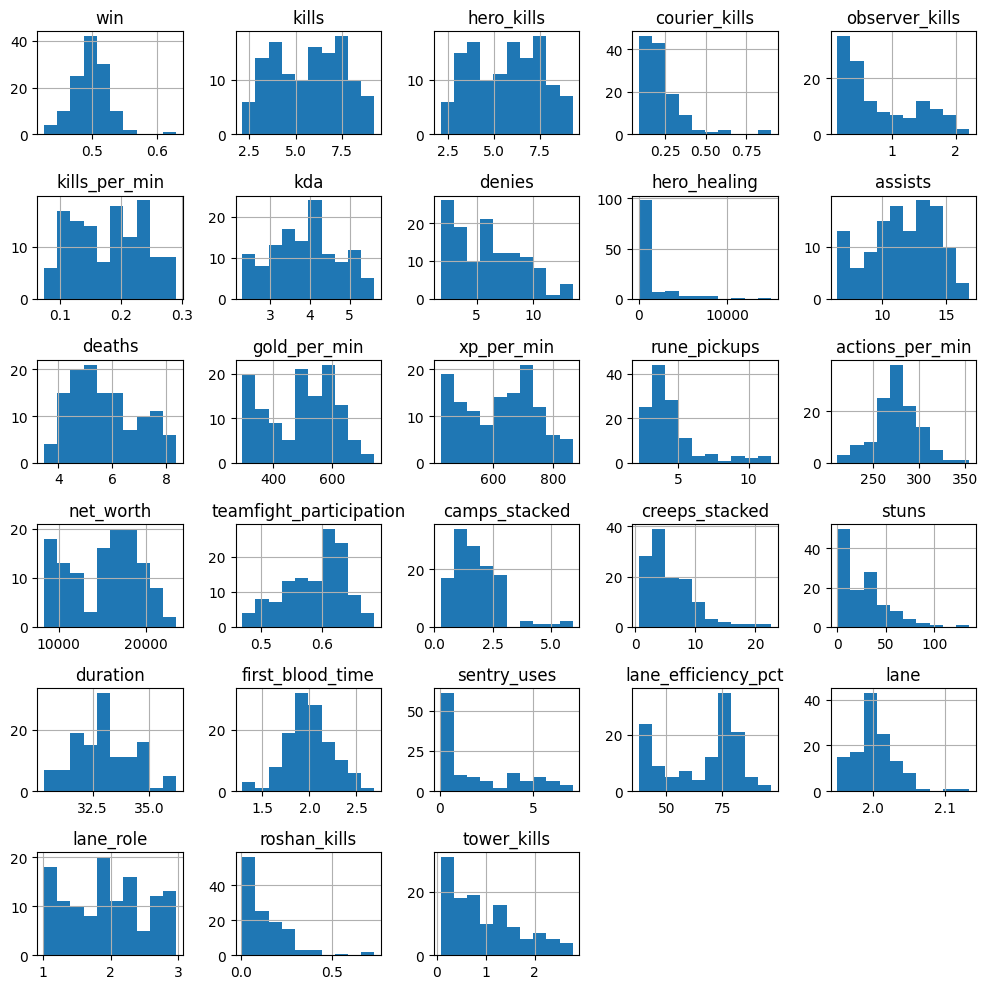

In [ ]:
heroes_stats.hist(figsize= (10,10))
plt.tight_layout()

## Корреляции

In [ ]:
# (изначальные данные по players, match) только числовых столбцов
columns = ['win', 'kills', 'kda', 'assists', 'deaths', 'gold_per_min', 'xp_per_min',
'actions_per_min', 'teamfight_participation', 'duration', 'first_blood_time']

<Axes: >

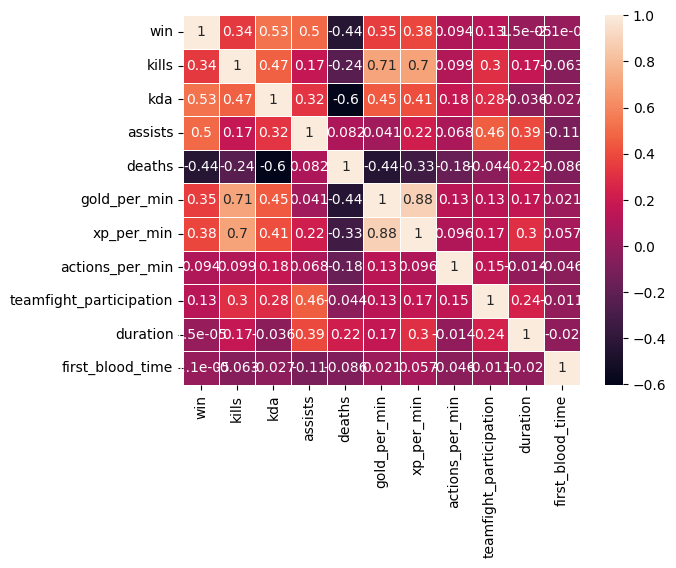

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
# (данные расчитанные по предыдущим матчам) только числовых столбцов
columns = ['win', 'previous_kills_avr', 'previous_kda_avr', 'previous_assists_avr',
'previous_deaths_avr', 'previous_gold_per_min_avr', 'previous_xp_per_min_avr',
'previous_actions_per_min_avr', 'previous_teamfight_participation_avr',
'previous_duration_avr', 'previous_first_blood_time_avr']

<Axes: >

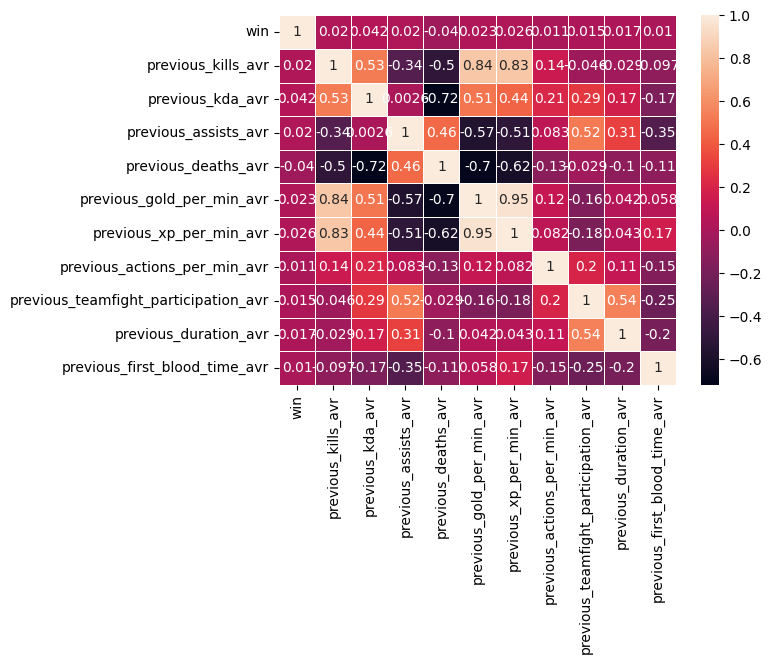

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
# данные расчитанные по предыдущим матчам и агрегированные по командам (средние значения)
columns = ['win', 'mean_previous_kills_avr', 'mean_previous_kda_avr', 'mean_previous_assists_avr',
'mean_previous_deaths_avr', 'mean_previous_gold_per_min_avr', 'mean_previous_xp_per_min_avr',
'mean_previous_actions_per_min_avr', 'mean_previous_teamfight_participation_avr',
'mean_previous_duration_avr', 'mean_previous_first_blood_time_avr']

<Axes: >

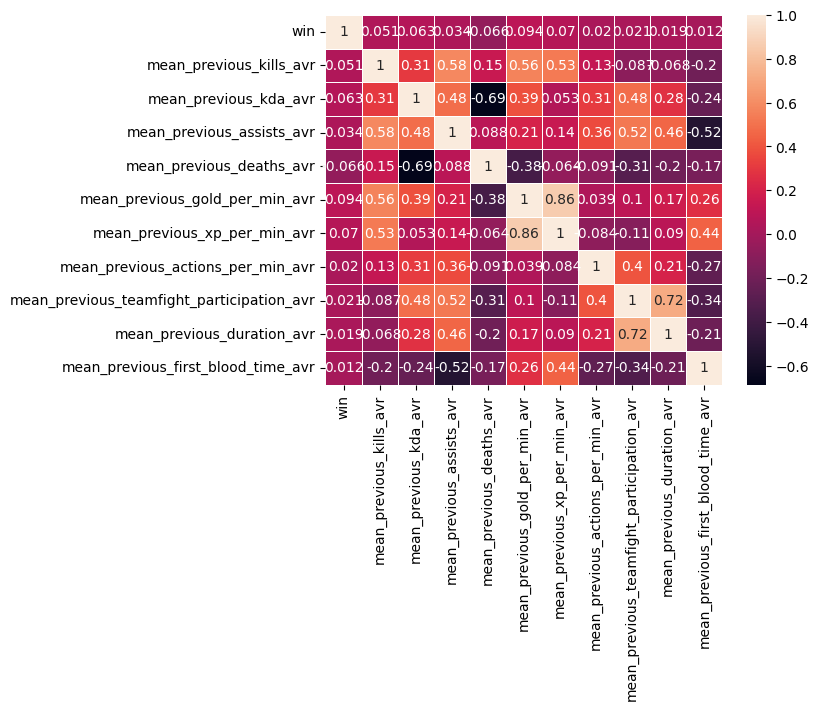

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
# данные расчитанные по предыдущим матчам и агрегированные по командам (max значения)
columns = ['win', 'max_previous_kills_avr', 'max_previous_kda_avr', 'max_previous_assists_avr',
'max_previous_deaths_avr', 'max_previous_gold_per_min_avr', 'max_previous_xp_per_min_avr',
'max_previous_actions_per_min_avr', 'max_previous_teamfight_participation_avr',
'max_previous_duration_avr', 'max_previous_first_blood_time_avr']

<Axes: >

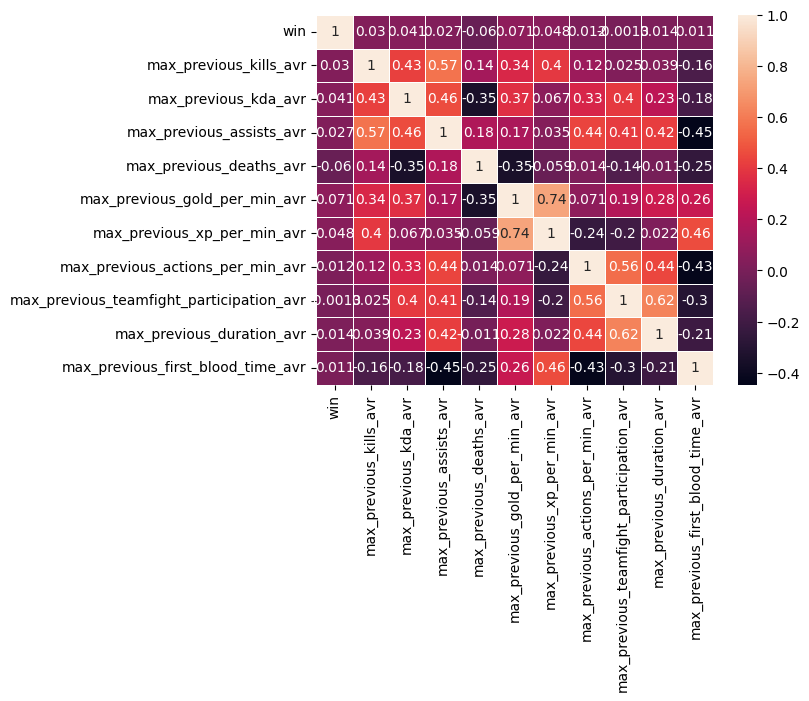

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
# данные расчитанные по предыдущим матчам и агрегированные по командам (min значения)
columns = ['win', 'min_previous_kills_avr', 'min_previous_kda_avr', 'min_previous_assists_avr',
'min_previous_deaths_avr', 'min_previous_gold_per_min_avr', 'min_previous_xp_per_min_avr',
'min_previous_actions_per_min_avr', 'min_previous_teamfight_participation_avr',
'min_previous_duration_avr', 'min_previous_first_blood_time_avr']

<Axes: >

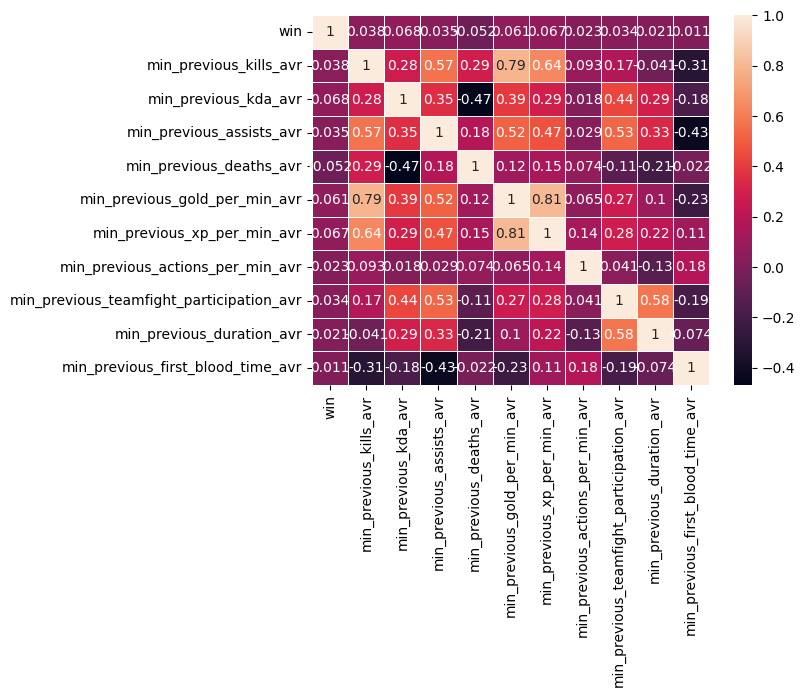

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

Победа в матче коррелирует с показателями игрока в данном матче, наибольшая корреляция win с kills, kda, assists. Поскольку предсказания будут строиться на момент начала матча, необходимо рассмотреть корреляцию с показателями, рассчитанными за предыдущие игры. Сильной корреляции с показателем win не наблюдается, возможно зависимость нелинейная. При этом показатели коррелируют между собой: корреляция между kills, gold, xp наблюдается при агрегации как по account_id так и по командам для каждого match_id.